In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn import cluster
from sklearn import mixture
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_sns = pd.read_csv('data/snsdata.csv')
data_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [4]:
data = data_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
data.shape

(30000, 36)

In [5]:
scaler = preprocessing.StandardScaler()

X_norm = scaler.fit_transform(data)

X_norm[0][0]

-0.3322172643985876

In [7]:
model = cluster.KMeans(n_clusters=9, random_state=42)
model.fit(X_norm)
model.inertia_

857169.1033997786

In [10]:
np.bincount(model.labels_)

array([19659,   930,     1,  4490,   851,   493,   762,  2098,   716])

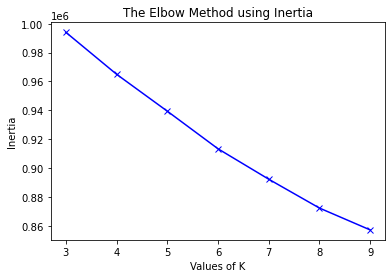

In [14]:
inertias = list()
n_clusters_list = list()
for n_clusters in range(3, 9+1):
    model = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(X_norm)
    n_clusters_list.append(n_clusters)
    inertias.append(model.inertia_)

plt.plot(n_clusters_list, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

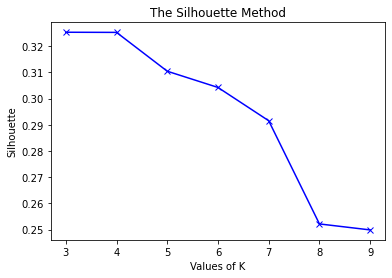

In [15]:
silhouette_scores = list()
n_clusters_list = list()
for n_clusters in range(3, 9+1):
    model = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    model.fit(X_norm)
    score = metrics.silhouette_score(X_norm, model.labels_)
    n_clusters_list.append(n_clusters)
    silhouette_scores.append(score)

plt.plot(n_clusters_list, silhouette_scores, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette')
plt.title('The Silhouette Method')
plt.show()

In [16]:
silhouette_scores

[0.3252983167661199,
 0.32524147109392326,
 0.3104227626278873,
 0.3042253962461188,
 0.29152119238612373,
 0.25213836279655444,
 0.24985471990292196]

In [18]:
model = cluster.KMeans(n_clusters=3, random_state=42)
model.fit(X_norm)

KMeans(n_clusters=3, random_state=42)

In [28]:
# data_norm = pd.DataFrame(X_norm, columns=data.columns)
data_cluster = pd.DataFrame(model.labels_, columns=['cluster'])
data_scored = pd.concat((data, data_cluster), axis=1)
data_scored.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,1


In [34]:
pd.DataFrame(data_scored.groupby('cluster').sum()).sum(axis=0).sort_values(ascending=False).head(5)

music       22135
god         13959
dance       12755
hair        12677
shopping    10590
dtype: int64

In [39]:
model = mixture.GaussianMixture(n_components=3, random_state=42)
model.fit(X_norm)
labels_pred = model.predict(X_norm)
np.bincount(labels_pred)

array([23426,  6573,     1])

In [40]:
data_cluster = pd.DataFrame(labels_pred, columns=['cluster'])
data_scored = pd.concat((data, data_cluster), axis=1)
data_scored.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,1


In [41]:
data_scored.cluster.value_counts()

0    23426
1     6573
2        1
Name: cluster, dtype: int64

In [45]:
data_scored[data_scored['cluster'] == 2].sum(axis=0).sort_values(ascending=False).head(5)

blonde    327
sex        22
hair       12
god        10
drunk       6
dtype: int64